# Importar librerias

In [363]:
# review current interpeter

import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# print(sys.executable)

# Manipulación y prepración de datos
* Importar los conjuntos de datos con los que se trabajará.
* Realizar tareas de limpieza de datos, eliminando valores nulos o inconsistentes.
* Realizar transformaciones necesarias para preparar los datos para el análisis y modelado.

Importar Datos

In [293]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938) 
  
# data (as pandas dataframes) 
X = regensburg_pediatric_appendicitis.data.features 
y = regensburg_pediatric_appendicitis.data.targets 
  
# metadata 
# print(regensburg_pediatric_appendicitis.metadata) 
  
# variable information 
print(regensburg_pediatric_appendicitis.variables) 


                                name     role         type demographic  \
0                                Age  Feature   Continuous         Age   
1                                BMI  Feature   Continuous        None   
2                                Sex  Feature  Categorical         Sex   
3                             Height  Feature   Continuous        None   
4                             Weight  Feature      Integer        None   
5                     Length_of_Stay  Feature      Integer        None   
6                         Management   Target  Categorical        None   
7                           Severity   Target  Categorical        None   
8              Diagnosis_Presumptive    Other       Binary        None   
9                          Diagnosis   Target       Binary        None   
10                    Alvarado_Score  Feature      Integer        None   
11     Paedriatic_Appendicitis_Score  Feature      Integer        None   
12                    Appendix_on_US  

* Realizar tareas de limpieza de datos, eliminando valores nulos o inconsistentes.

In [294]:
features_df = regensburg_pediatric_appendicitis.variables

In [295]:
# Identificación de variables numéricas

continous_df = features_df[(features_df['type'] == 'Continuous') & (features_df['role'] == 'Feature')]
continous_features = continous_df['name'].unique()
continuous_features = list(continous_features)
continuous_features

['Age',
 'BMI',
 'Height',
 'Body_Temperature',
 'WBC_Count',
 'RBC_Count',
 'Hemoglobin',
 'RDW']

In [296]:
# Identificación de variables categóricas

categorical_df = features_df[(features_df['type'] == 'Categorical') & (features_df['role'] == 'Feature')]
categorical_features = categorical_df['name'].unique()
categorical_features = list(categorical_features)
categorical_features

['Sex',
 'Neutrophilia',
 'Ketones_in_Urine',
 'RBC_in_Urine',
 'WBC_in_Urine',
 'Stool',
 'Peritonitis',
 'Psoas_Sign',
 'Ipsilateral_Rebound_Tenderness',
 'US_Performed',
 'Free_Fluids',
 'Appendix_Wall_Layers',
 'Target_Sign',
 'Appendicolith',
 'Perfusion',
 'Perforation',
 'Surrounding_Tissue_Reaction',
 'Appendicular_Abscess',
 'Abscess_Location',
 'Lymph_Nodes_Location',
 'Ileus',
 'Coprostasis',
 'Meteorism',
 'Enteritis',
 'Gynecological_Findings']

In [297]:
# Identificación de variables binarias

binary_df = features_df[(features_df['type'] == 'Binary') & (features_df['role'] == 'Feature')]
binary_features = binary_df['name'].unique()
binary_features = list(binary_features)
binary_features

['Appendix_on_US',
 'Migratory_Pain',
 'Lower_Right_Abd_Pain',
 'Contralateral_Rebound_Tenderness',
 'Coughing_Pain',
 'Nausea',
 'Loss_of_Appetite',
 'Dysuria',
 'Pathological_Lymph_Nodes',
 'Bowel_Wall_Thickening',
 'Conglomerate_of_Bowel_Loops']

In [298]:
# Identificación de variables integer

features_df = regensburg_pediatric_appendicitis.variables
integer_df = features_df[(features_df['type'] == 'Integer') & (features_df['role'] == 'Feature')]
integer_features = integer_df['name'].unique()
integer_features= list(integer_features)
integer_features

['Weight',
 'Length_of_Stay',
 'Alvarado_Score',
 'Paedriatic_Appendicitis_Score',
 'Appendix_Diameter',
 'Neutrophil_Percentage',
 'Segmented_Neutrophils',
 'Thrombocyte_Count',
 'CRP']

In [299]:
# calculate null values
data_nulls = X.isnull().sum()
df_nulls = pd.DataFrame(data_nulls, columns = ['Nulls'])
df_nulls.reset_index(inplace = True)
df_nulls.rename(columns = {'index':'Feature'}, inplace = True)
df_nulls. head()

,Feature,Nulls
0,Age,1
1,BMI,27
2,Sex,2
3,Height,26
4,Weight,3


There are null values for categorial variables which seem to indicate not the lack of value but more the absence of a desease

In [300]:
# calculate % of nulls values
records = len(X)
df_percentage_nulls = df_nulls
df_percentage_nulls['total_recordsrecords'] = records
df_percentage_nulls['nulls_percent(%)'] = df_percentage_nulls['Nulls'] / records
df_percentage_nulls.head()
df_percentage_nulls.sort_values(by= 'nulls_percent(%)', ascending= False).head()

,Feature,Nulls,total_recordsrecords,nulls_percent(%)
43,Abscess_Location,769,782,0.983376
52,Gynecological_Findings,756,782,0.966752
47,Conglomerate_of_Bowel_Loops,739,782,0.945013
19,Segmented_Neutrophils,728,782,0.930946
48,Ileus,722,782,0.923274


In [301]:
# calculate null values for continuous variables
filtered_df = df_percentage_nulls[df_percentage_nulls['Feature'].isin(continuous_features)]
filtered_df


,Feature,Nulls,total_recordsrecords,nulls_percent(%)
0,Age,1,782,0.001279
1,BMI,27,782,0.034527
3,Height,26,782,0.033248
16,Body_Temperature,7,782,0.008951
17,WBC_Count,6,782,0.007673
21,RBC_Count,18,782,0.023018
22,Hemoglobin,18,782,0.023018
23,RDW,26,782,0.033248


In [302]:
# Iterar sobre variables no categoricas e imputar con la moda

for feature in continous_features:
    mean_value = X[feature].mean()    
    # Fill NaN values with the median of the column
    X.loc[:, feature] = X[feature].fillna(mean_value)

for feature in integer_features:
    mean_value = X[feature].mean()    
    # Fill NaN values with the median of the column
    X.loc[:, feature] = X[feature].fillna(mean_value)    

In [303]:
# validar datos nulos para variables continous

data_nulls = X.isnull().sum()
df_nulls = pd.DataFrame(data_nulls, columns = ['Nulls'])
df_nulls.reset_index(inplace = True)
df_nulls.rename(columns = {'index':'Feature'}, inplace = True)
df_nulls.sort_values(by = 'Nulls', ascending= False).head()

,Feature,Nulls
43,Abscess_Location,769
52,Gynecological_Findings,756
47,Conglomerate_of_Bowel_Loops,739
48,Ileus,722
39,Perfusion,719


* Realizar transformaciones necesarias para preparar los datos para el análisis y modelado.

In [304]:
# Iterar sobre variables categoricas


for feature in categorical_features:
    # print(X[feature].unique())
    X.loc[:, feature] = X[feature].fillna('Not present') 

for feature in binary_features:
    # print(X[feature].unique())
    X.loc[:, feature] = X[feature].fillna('Unkown') 

In [313]:
# validar datos nulos finales después de transformación para variables continuas, categóricas, binarias e integers
data_nulls = X.isnull().sum()
df_nulls = pd.DataFrame(data_nulls, columns = ['Nulls'])
df_nulls.reset_index(inplace = True)
df_nulls.rename(columns = {'index':'Feature'}, inplace = True)
df_nulls.sort_values(by = 'Nulls', ascending= False)

,Feature,Nulls
0,Age,0
27,WBC_in_Urine,0
29,Dysuria,0
30,Stool,0
31,Peritonitis,0
32,Psoas_Sign,0
33,Ipsilateral_Rebound_Tenderness,0
34,US_Performed,0
35,Free_Fluids,0
36,Appendix_Wall_Layers,0


* Integrar variable dependiente e independiente en un solo dataset

In [306]:
X.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.100000,...,Not present,yes,reUB,Unkown,Unkown,Not present,Not present,Not present,Not present,Not present
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,7.762651,...,Not present,Unkown,Not present,Unkown,Unkown,Not present,Not present,yes,Not present,Not present
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,7.762651,...,Not present,Unkown,Not present,Unkown,Unkown,Not present,Not present,yes,yes,Not present
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,7.762651,...,Not present,yes,reUB,Unkown,Unkown,Not present,Not present,Not present,yes,Not present
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.000000,...,Not present,yes,reUB,Unkown,Unkown,Not present,Not present,Not present,yes,Not present


In [307]:
# la variable a predecir será sólo el diagnóstico no el nivel de severidad / management
y.head()

,Management,Severity,Diagnosis
0,conservative,uncomplicated,appendicitis
1,conservative,uncomplicated,no appendicitis
2,conservative,uncomplicated,no appendicitis
3,conservative,uncomplicated,no appendicitis
4,conservative,uncomplicated,appendicitis


In [308]:
y = y['Diagnosis']
y = pd.DataFrame(y)
y.head()


,Diagnosis
0,appendicitis
1,no appendicitis
2,no appendicitis
3,no appendicitis
4,appendicitis


# Exploración y preprocesamiento de datos
* Realizar análisis exploratorio de datos (EDA) utilizando visualizaciones y estadísticas descriptivas.
* Aplicar técnicas de preprocesamiento como normalización, codificación de variables categóricas y reducción de dimensionalidad.


* Estadísticas descriptivas

In [309]:
X.describe()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
count,782.000000,782.000000,782.00000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,11.346451,18.907012,148.01746,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900
std,3.527649,4.308862,19.40079,17.357550,2.567457,2.082962,1.892135,2.023563,0.899619,5.345871,13.476199,3.929691,0.493228,1.377122,4.462585,71.654101,57.027956
min,0.000000,7.830000,53.00000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000
25%,9.210000,15.805000,138.00000,29.500000,3.000000,4.000000,4.000000,7.000000,36.800000,8.300000,63.825000,64.929630,4.540000,12.700000,12.300000,236.000000,1.000000
50%,11.440000,18.280000,149.00000,41.450000,3.000000,6.000000,5.000000,7.762651,37.200000,12.000000,71.900000,64.929630,4.790000,13.380497,12.800000,277.000000,7.000000
75%,14.080000,21.015000,162.22500,54.000000,5.000000,8.000000,6.000000,8.000000,37.900000,16.200000,82.375000,64.929630,5.010000,14.000000,13.300000,328.750000,32.000000
max,18.360000,38.160000,192.00000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000


* Distribución de los datos

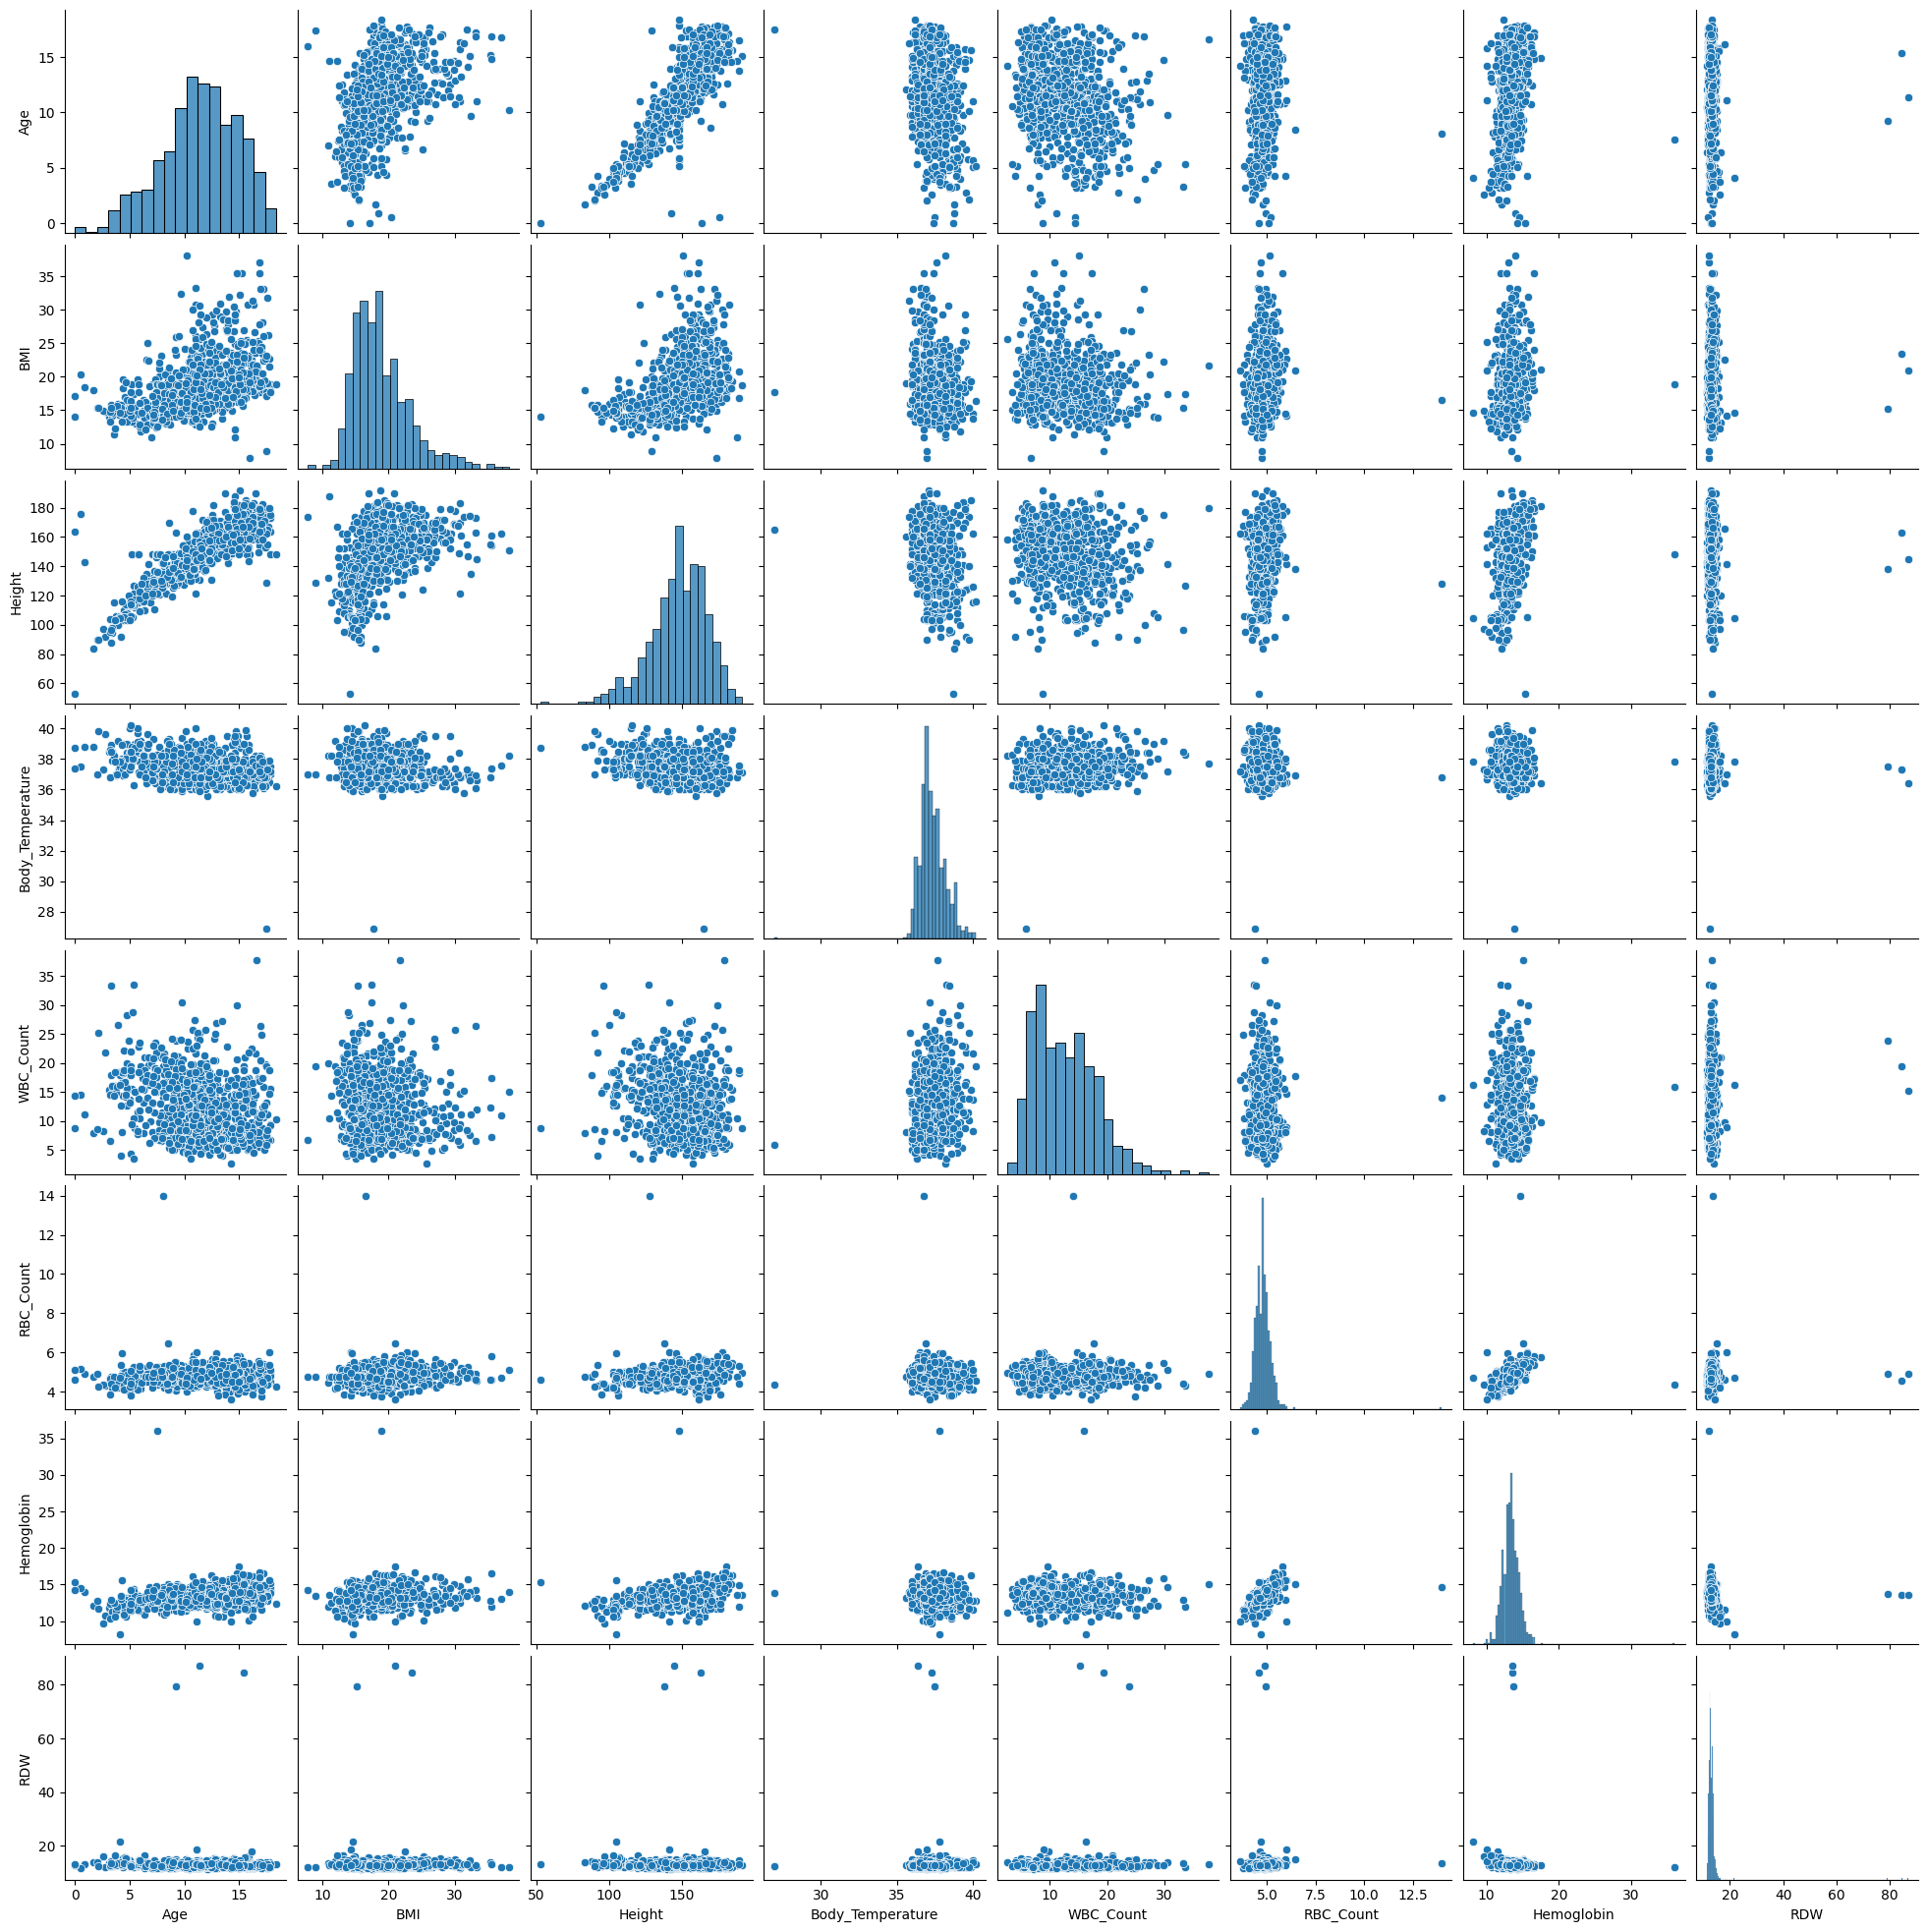

In [310]:
sns.pairplot(X[continous_features])

* Data normalization for continous variables

In [311]:
scaler = MinMaxScaler()
continous_df_features = pd.DataFrame(scaler.fit_transform(X[continous_features]), columns = X[continous_features].columns)
continous_df_features.head()

,Age,BMI,Height,Body_Temperature,WBC_Count,RBC_Count,Hemoglobin,RDW
0,0.690632,0.299044,0.683453,0.759398,0.145299,0.158960,0.237410,0.013210
1,0.767974,0.793604,0.676259,0.751880,0.156695,0.157996,0.269784,0.019815
2,0.770153,0.510056,0.791367,0.729323,0.301994,0.034682,0.115108,0.013210
3,0.891612,0.421035,0.805755,0.684211,0.250712,0.098266,0.194245,0.026420
4,0.603486,0.299044,0.791367,0.751880,0.156695,0.078998,0.158273,0.031704


* One hot encoding for categorical variables and binary variables

In [321]:
categorical_df_features = pd.concat([X[categorical_features],X[binary_features]], axis = 1)
categorical_df_features = pd.get_dummies(categorical_df_features, drop_first = True)
categorical_df_features.head()

,Sex_female,Sex_male,Neutrophilia_no,Neutrophilia_yes,Ketones_in_Urine_++,Ketones_in_Urine_+++,Ketones_in_Urine_Not present,Ketones_in_Urine_no,RBC_in_Urine_++,RBC_in_Urine_+++,...,Loss_of_Appetite_no,Loss_of_Appetite_yes,Dysuria_no,Dysuria_yes,Pathological_Lymph_Nodes_no,Pathological_Lymph_Nodes_yes,Bowel_Wall_Thickening_no,Bowel_Wall_Thickening_yes,Conglomerate_of_Bowel_Loops_no,Conglomerate_of_Bowel_Loops_yes
0,True,False,True,False,True,False,False,False,False,False,...,False,True,True,False,False,True,False,False,False,False
1,False,True,True,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,True,False,True,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,False,False,False
3,True,False,True,False,False,False,False,True,False,False,...,False,True,False,True,False,True,False,False,False,False
4,True,False,True,False,False,False,False,True,False,False,...,False,True,True,False,False,True,False,False,False,False


* PCA analysis for continous variables

Explained variance ratio: [0.54784266 0.1909188  0.12192753]


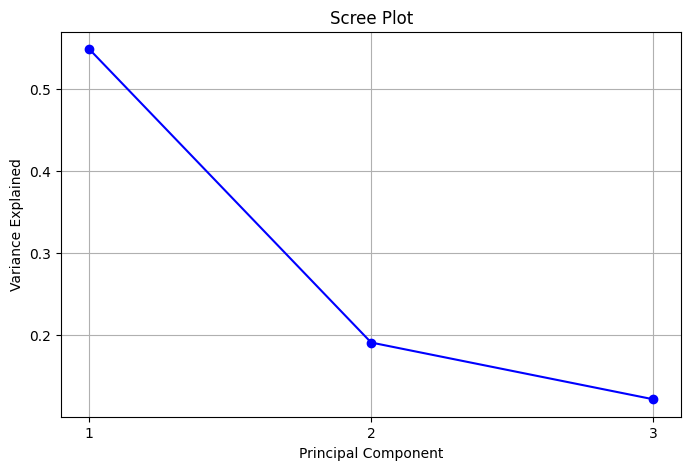

In [345]:
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(continous_df_features)

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Explained variance ratio (how much variance each principal component explains)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

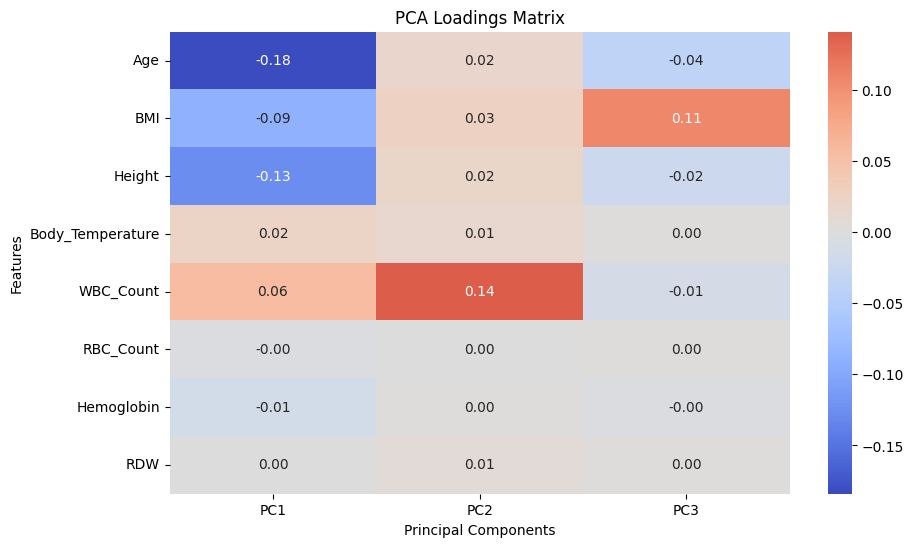

In [346]:

# Create the loadings matrix
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Convert to a DataFrame for better readability
loadings_df = pd.DataFrame(loadings, index=continous_df_features.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
loadings_df

plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, center=0)
plt.title('PCA Loadings Matrix')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


* To avoid high dimensionality, AGE,BMI,HEIGHT,WBC_COUNT features can be choosen

In [348]:
selected_features = ['Age','BMI','Height','WBC_Count']
continous_df_features = continous_df_features[selected_features]
continous_df_features.head()

,Age,BMI,Height,WBC_Count
0,0.690632,0.299044,0.683453,0.145299
1,0.767974,0.793604,0.676259,0.156695
2,0.770153,0.510056,0.791367,0.301994
3,0.891612,0.421035,0.805755,0.250712
4,0.603486,0.299044,0.791367,0.156695


* Data integration

In [351]:
# generate x_dataset

X_data = pd.concat([continous_df_features,categorical_df_features], axis = 1)
X_data = pd.concat([X_data,X[integer_features]], axis = 1)
X_data

,Age,BMI,Height,WBC_Count,Sex_female,Sex_male,Neutrophilia_no,Neutrophilia_yes,Ketones_in_Urine_++,Ketones_in_Urine_+++,...,Conglomerate_of_Bowel_Loops_yes,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Neutrophil_Percentage,Segmented_Neutrophils,Thrombocyte_Count,CRP
0,0.690632,0.299044,0.683453,0.145299,True,False,True,False,True,False,...,False,37.0,3.0,4.0,3.0,7.100000,68.2,64.92963,254.0,0.0
1,0.767974,0.793604,0.676259,0.156695,False,True,True,False,False,False,...,False,69.5,2.0,5.0,4.0,7.762651,64.8,64.92963,151.0,3.0
2,0.770153,0.510056,0.791367,0.301994,True,False,True,False,False,False,...,False,62.0,4.0,5.0,3.0,7.762651,74.8,64.92963,300.0,3.0
3,0.891612,0.421035,0.805755,0.250712,True,False,True,False,False,False,...,False,56.0,3.0,7.0,6.0,7.762651,63.0,64.92963,258.0,0.0
4,0.603486,0.299044,0.791367,0.156695,True,False,True,False,False,False,...,False,45.0,3.0,5.0,6.0,7.000000,44.0,64.92963,311.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0.675926,0.574349,0.816547,0.250712,True,False,False,True,False,False,...,False,70.0,4.0,8.0,7.0,7.500000,76.6,64.92963,243.0,71.0
778,0.930828,0.415430,0.755396,0.421652,True,False,False,True,False,False,...,True,51.0,6.0,5.0,3.0,7.762651,89.2,64.92963,310.0,245.0
779,0.816449,0.398286,0.712230,0.341880,True,False,True,False,False,False,...,False,46.0,4.0,5.0,3.0,7.762651,68.5,64.92963,328.0,2.0
780,0.392157,0.213320,0.548921,0.433048,False,True,False,True,False,True,...,False,23.9,5.0,9.0,8.0,14.000000,77.0,64.92963,345.0,8.0


In [355]:
y_data = pd.DataFrame(y['Diagnosis'])
y_data

,Diagnosis
0,appendicitis
1,no appendicitis
2,no appendicitis
3,no appendicitis
4,appendicitis
...,...
777,appendicitis
778,appendicitis
779,appendicitis
780,appendicitis


In [369]:
# Resulting dataframe
uci_df = pd.concat([X_data,y_data], axis = 1)
uci_df.head()

,Age,BMI,Height,WBC_Count,Sex_female,Sex_male,Neutrophilia_no,Neutrophilia_yes,Ketones_in_Urine_++,Ketones_in_Urine_+++,...,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Neutrophil_Percentage,Segmented_Neutrophils,Thrombocyte_Count,CRP,Diagnosis
0,0.690632,0.299044,0.683453,0.145299,True,False,True,False,True,False,...,37.0,3.0,4.0,3.0,7.100000,68.2,64.92963,254.0,0.0,appendicitis
1,0.767974,0.793604,0.676259,0.156695,False,True,True,False,False,False,...,69.5,2.0,5.0,4.0,7.762651,64.8,64.92963,151.0,3.0,no appendicitis
2,0.770153,0.510056,0.791367,0.301994,True,False,True,False,False,False,...,62.0,4.0,5.0,3.0,7.762651,74.8,64.92963,300.0,3.0,no appendicitis
3,0.891612,0.421035,0.805755,0.250712,True,False,True,False,False,False,...,56.0,3.0,7.0,6.0,7.762651,63.0,64.92963,258.0,0.0,no appendicitis
4,0.603486,0.299044,0.791367,0.156695,True,False,True,False,False,False,...,45.0,3.0,5.0,6.0,7.000000,44.0,64.92963,311.0,0.0,appendicitis


In [368]:

#Resulting dataframe

# current_directory = os.getcwd()
# parent_directory = os.path.dirname(current_directory)


# uci_df.to_csv(os.path.join(current_directory,'uci_df.csv'))

# Versionado de datos

* Utilizar herramientas de versionado de datos para mantener un registro de cambios y versiones de los conjuntos de datos utilizados.
* Documentar todas las modificaciones realizadas en los datos.

# Construcción, ajuste y evaluación de modelos de machine learning
* Seleccionar algoritmos de Machine Learning adecuados para resolver el problema planteado.
* Entrenar los modelos utilizando los datos preprocesados.
* Realizar ajustes de hiperparámetros para optimizar el rendimiento del modelo.
* Evaluar los modelos utilizando métricas de rendimiento específicas.


# Aplicación de mejores prácticas en el pipeline de modelado
* Implementar pipelines de Machine Learning en donde se automaticen las tareas de preprocesamiento, entrenamiento y evaluación.
* Documentar cada paso del pipeline para asegurar claridad y reproducibilidad.


# Estructuración y refactorización del código
* Organizar el código en módulos y funciones bien definidas.
* Aplicar principios de programación orientada a objetos para mejorar la estructura del código.
* Refactorizar el código existente para mejorar su eficiencia y mantenibilidad.

# Presentación ejectuvia de pase pdf